In [1]:
library(dplyr)
library(ggplot2)
library(statsr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: BayesFactor

Loading required package: coda

Loading required package: Matrix

************
Welcome to BayesFactor 0.9.12-4.3. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************



To do so, you can 

- click on the green arrow at the top of the code chunk in the R Markdown (Rmd) 
file, or
- highlight these lines, and hit the **Run** button on the upper right corner of the 
pane, or
- type the code in the console.

Going forward you will be asked to load any relevant packages at the beginning
of each lab.

## Dataset 1: Dr. Arbuthnot's Baptism Records

To get you started, run the following command to load the data.

In [2]:
data(arbuthnot)

To do so, once again, you can 

- click on the green arrow at the top of the code chunk in the R Markdown (Rmd) 
file, or
- put your cursor on this line, and hit the **Run** button on the upper right 
corner of the pane, or
- type the code in the console.

This command instructs R to load some data. The Arbuthnot baptism counts for boys 
and girls. You should see that the workspace area in the upper righthand corner of 
the RStudio window now lists a data set called `arbuthnot` that has 82 observations 
on 3 variables. As you interact with R, you will create a series of objects. 
Sometimes you load them as we have done here, and sometimes you create them yourself 
as the byproduct of a computation or some analysis you have performed.

The Arbuthnot data set refers to Dr. John Arbuthnot, an 18<sup>th</sup> century 
physician, writer, and mathematician. He was interested in the ratio of newborn
boys to newborn girls, so he gathered the baptism records for children born in
London for every year from 1629 to 1710. We can take a look at the data by 
typing its name into the console.

In [3]:
#r view-data
arbuthnot

year,boys,girls
<int>,<int>,<int>
1629,5218,4683
1630,4858,4457
1631,4422,4102
1632,4994,4590
1633,5158,4839
1634,5035,4820
1635,5106,4928
1636,4917,4605
1637,4703,4457


However printing the whole dataset in the console is not that useful. 
One advantage of RStudio is that it comes with a built-in data viewer. Click on
the name `arbuthnot` in the *Environment* pane (upper right window) that lists 
the objects in your workspace. This will bring up an alternative display of the 
data set in the *Data Viewer* (upper left window). You can close the data viewer
by clicking on the *x* in the upper lefthand corner.

What you should see are four columns of numbers, each row representing a 
different year: the first entry in each row is simply the row number (an index 
we can use to access the data from individual years if we want), the second is 
the year, and the third and fourth are the numbers of boys and girls baptized 
that year, respectively. Use the scrollbar on the right side of the console 
window to examine the complete data set.

Note that the row numbers in the first column are not part of Arbuthnot's data. 
R adds them as part of its printout to help you make visual comparisons. You can
think of them as the index that you see on the left side of a spreadsheet. In 
fact, the comparison to a spreadsheet will generally be helpful. R has stored 
Arbuthnot's data in a kind of spreadsheet or table called a *data frame*.

You can see the dimensions of this data frame by typing:

In [4]:
#r dim-data
dim(arbuthnot)

[1] 82  3

This command should output `[1] 82 3`, indicating that there are 82 rows and 3 
columns (we'll get to what the `[1]` means in a bit), just as it says next to 
the object in your workspace. You can see the names of these columns (or 
variables) by typing:

In [5]:
names(arbuthnot)

[1] "year"  "boys"  "girls"

1. How many variables are included in this data set? 
<ol>
<li> 2 </li>
<li> >>3 </li>
<li> 4 </li>
<li> 82 </li>
<li> 1710 </li>
</ol>

<div id="exercise">
**Exercise**: What years are included in this dataset? Hint: Take a look at the year 
variable in the Data Viewer to answer this question.
</div>

You should see that the data frame contains the columns `year`,  `boys`, and 
`girls`. At this point, you might notice that many of the commands in R look a 
lot like functions from math class; that is, invoking R commands means supplying
a function with some number of arguments. The `dim` and `names` commands, for 
example, each took a single argument, the name of a data frame.

<div id="boxedtext">
**Tip: ** If you use the up and down arrow keys, you can scroll through your 
previous commands, your so-called command history. You can also access it 
by clicking on the history tab in the upper right panel. This will save 
you a lot of typing in the future.
</div>

### R Markdown

So far we asked you to type your commands in the console. The console is a great 
place for playing around with some code, however it is not a good place for 
documenting your work. Working in the console exclusively makes it difficult to 
document your work as you go, and reproduce it later. 

R Markdown is a great solution for this problem. And, you already have worked with 
an R Markdown document -- this lab! Going forward type the code for the questions 
in the code chunks provided in the R Markdown (Rmd) document for the lab, and **Knit**
the document to see the results.

### Some Exploration

Let's start to examine the data a little more closely. We can access the data in
a single column of a data frame separately using a command like

In [6]:
arbuthnot$boys

[1] 5218 4858 4422 4994 5158 5035 5106 4917 4703 5359 5366 5518 5470 5460 4793
[16] 4107 4047 3768 3796 3363 3079 2890 3231 3220 3196 3441 3655 3668 3396 3157
[31] 3209 3724 4748 5216 5411 6041 5114 4678 5616 6073 6506 6278 6449 6443 6073
[46] 6113 6058 6552 6423 6568 6247 6548 6822 6909 7577 7575 7484 7575 7737 7487
[61] 7604 7909 7662 7602 7676 6985 7263 7632 8062 8426 7911 7578 8102 8031 7765
[76] 6113 8366 7952 8379 8239 7840 7640

This command will only show the number of boys baptized each year. The dollar
sign basically says "go to the data frame that comes before me, and find the 
variable that comes after me".

2. What command would you use to extract just the counts of girls born? 
<ol>
<li> `arbuthnot$boys` </li>
<li> >>`arbuthnot$girls` </li>
<li> `girls` </li>
<li> `arbuthnot[girls]` </li>
<li> `$girls` </li>
</ol>

In [7]:
arbuthnot$girls

[1] 4683 4457 4102 4590 4839 4820 4928 4605 4457 4952 4784 5332 5200 4910 4617
[16] 3997 3919 3395 3536 3181 2746 2722 2840 2908 2959 3179 3349 3382 3289 3013
[31] 2781 3247 4107 4803 4881 5681 4858 4319 5322 5560 5829 5719 6061 6120 5822
[46] 5738 5717 5847 6203 6033 6041 6299 6533 6744 7158 7127 7246 7119 7214 7101
[61] 7167 7302 7392 7316 7483 6647 6713 7229 7767 7626 7452 7061 7514 7656 7683
[76] 5738 7779 7417 7687 7623 7380 7288

Notice that the way R has printed these data is different. When we looked at the
complete data frame, we saw 82 rows, one on each line of the display. These data
are no longer structured in a table with other variables, so they are displayed 
one right after another. Objects that print out in this way are called vectors; 
they represent a set of numbers. R has added numbers in [brackets] along the left
side of the printout to indicate locations within the vector. For example, in the arbuthnot$boys vector, 5218  follows [1], indicating that 5218 is the first entry in the vector. And if [43] starts a line, then that would mean the first number on that line would represent the 43rd entry in the vector.

R has some powerful functions for making graphics. We can create a simple plot 
of the number of girls baptized per year with the command

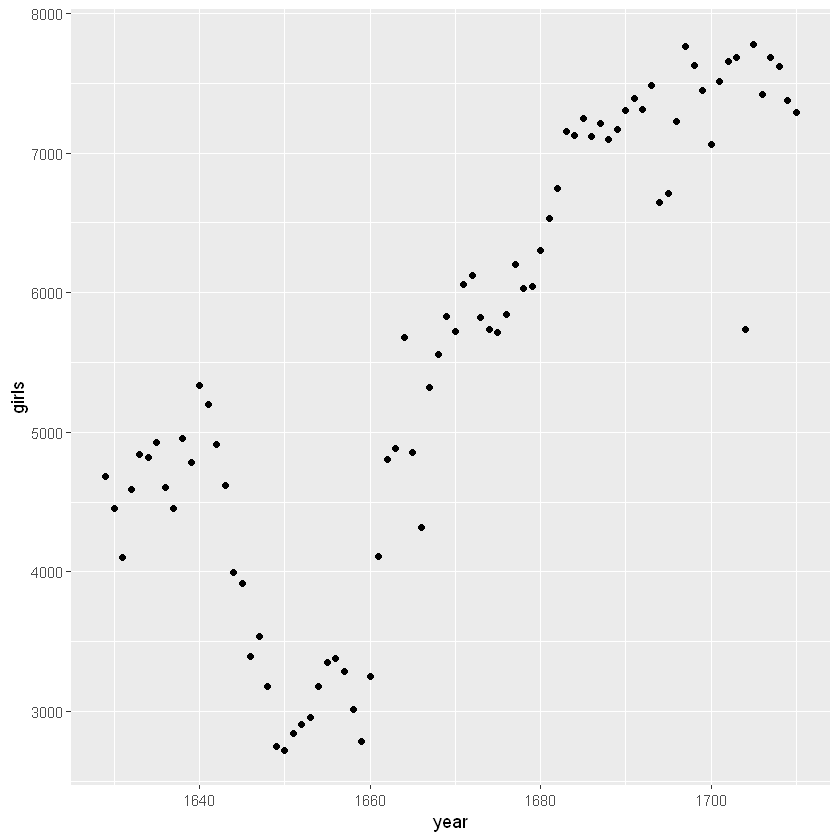

In [8]:
ggplot(data = arbuthnot, aes(x = year, y = girls)) +
  geom_point()

Before we review the code for this plot, let's summarize the trends we see in the 
data.

1. Which of the following best describes the number of girls baptised over the years included in this dataset? 
<ol>
<li> There appears to be no trend in the number of girls baptised from 1629 to 1710. </li>
<li> >>There is initially an increase in the number of girls baptised, which peaks around 1640. After 1640 there is a decrease in the number of girls baptised, but the number begins to increase again in 1660. Overall the trend is an increase in the number of girls baptised. </li>
<li> There is initially an increase in the number of girls baptised. This number peaks around 1640 and then after 1640 the number of girls baptised decreases. </li>
<li> The number of girls baptised has decreased over time. </li>
<li> There is an initial increase in the number of girls baptised but this number appears to level around 1680 and not change after that time point. </li>
</ol>

Back to the code... We use the `ggplot()` function to build plots. If you run the 
plotting code in your console, you should see the plot appear under the *Plots* tab 
of the lower right panel of RStudio. Notice that the command above again looks like 
a function, this time with arguments separated by commas. 

- The first argument is always the dataset. 
- Next, we provide thevariables from the dataset to be assigned to `aes`thetic 
elements of the plot, e.g. the x and the y axes. 
- Finally, we use another layer, separated by a `+` to specify the `geom`etric 
object for the plot. Since we want to scatterplot, we use `geom_point`.

You might wonder how you are supposed to know the syntax for the `ggplot` function. 
Thankfully, R documents all of its functions extensively. To read what a function 
does and learn the arguments that are available to you, just type in a question mark 
followed by the name of the function that you're interested in. Try the following in
your console:

```{r plot-help, tidy = FALSE}
?ggplot
```

Notice that the help file replaces the plot in the lower right panel. You can 
toggle between plots and help files using the tabs at the top of that panel. 

<div id="boxedtext">
More extensive help for plotting with the `ggplot2` package can be found at 
http://docs.ggplot2.org/current/. The best (and easiest) way to learn the syntax is 
to take a look at the sample plots provided on that page, and modify the code 
bit by bit until you get achieve the plot you want.
</div>

### R as a big calculator

Now, suppose we want to plot the total number of baptisms. To compute this, we 
could use the fact that R is really just a big calculator. We can type in 
mathematical expressions like

In [9]:
5218 + 4683

[1] 9901

to see the total number of baptisms in 1629. We could repeat this once for each 
year, but there is a faster way. If we add the vector for baptisms for boys to 
that of girls, R will compute all sums simultaneously.

In [10]:
arbuthnot$boys + arbuthnot$girls

[1]  9901  9315  8524  9584  9997  9855 10034  9522  9160 10311 10150 10850
[13] 10670 10370  9410  8104  7966  7163  7332  6544  5825  5612  6071  6128
[25]  6155  6620  7004  7050  6685  6170  5990  6971  8855 10019 10292 11722
[37]  9972  8997 10938 11633 12335 11997 12510 12563 11895 11851 11775 12399
[49] 12626 12601 12288 12847 13355 13653 14735 14702 14730 14694 14951 14588
[61] 14771 15211 15054 14918 15159 13632 13976 14861 15829 16052 15363 14639
[73] 15616 15687 15448 11851 16145 15369 16066 15862 15220 14928

What you will see are 82 numbers (in that packed display, because we aren’t 
looking at a data frame here), each one representing the sum we’re after. Take a
look at a few of them and verify that they are right.

### Adding a new variable to the data frame

We'll be using this new vector to generate some plots, so we'll want to save it 
as a permanent column in our data frame.

In [11]:
arbuthnot <- arbuthnot %>%
  mutate(total = boys + girls)

## What in the world is going on here? The `%>%` operator is called the *piping*
operator. Basically, it takes the output of the current line and pipes it into 
the following line of code.
<div id="boxedtext">
**A note on piping: ** Note that we can read these three lines of code as the following: 

*"Take the `arbuthnot` dataset and **pipe** it into the `mutate` function. 
Using this mutate a new variable called `total` that is the sum of the variables
called `boys` and `girls`. Then assign this new resulting dataset to the object
called `arbuthnot`, i.e. overwrite the old `arbuthnot` dataset with the new one
containing the new variable."*

This is essentially equivalent to going through each row and adding up the boys 
and girls counts for that year and recording that value in a new column called
total.
</div>

<div id="boxedtext">
**Where is the new variable? ** When you make changes to variables in your dataset, 
click on the name of the dataset again to update it in the data viewer.
</div>

You'll see that there is now a new column called `total` that has been tacked on
to the data frame. The special symbol `<-` performs an *assignment*, taking the 
output of one line of code and saving it into an object in your workspace. In 
this case, you already have an object called `arbuthnot`, so this command updates
that data set with the new mutated column.

We can make a plot of the total number of baptisms per year with the following command.


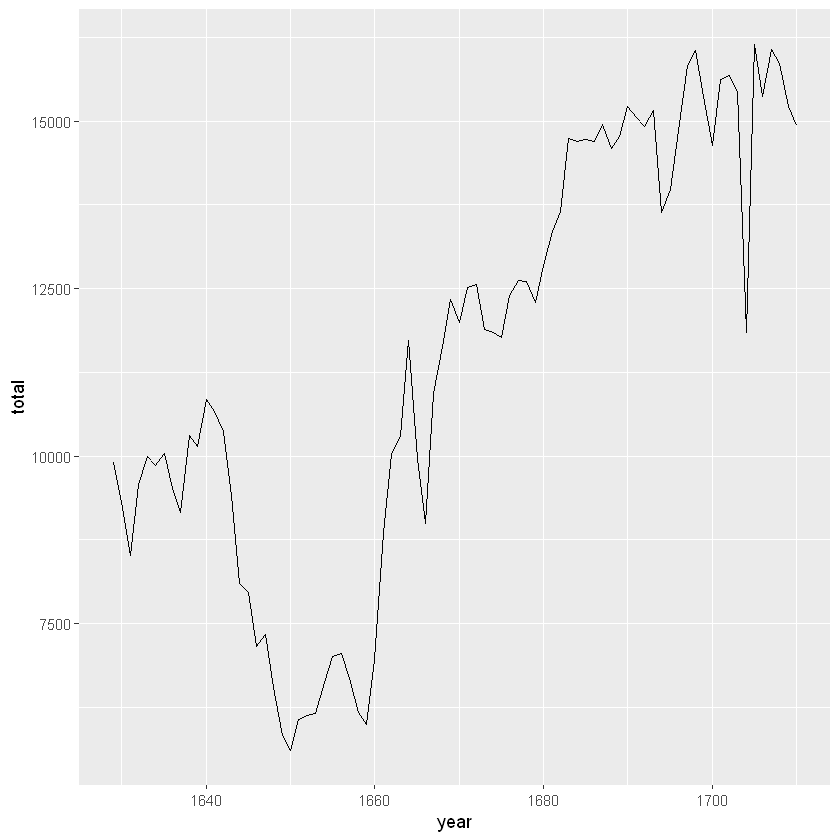

In [13]:
ggplot(data = arbuthnot, aes(x = year, y = total)) +
  geom_line()

Note that using `geom_line()` instead of `geom_point()` results in a line plot instead
of a scatter plot. You want both? Just layer them on:

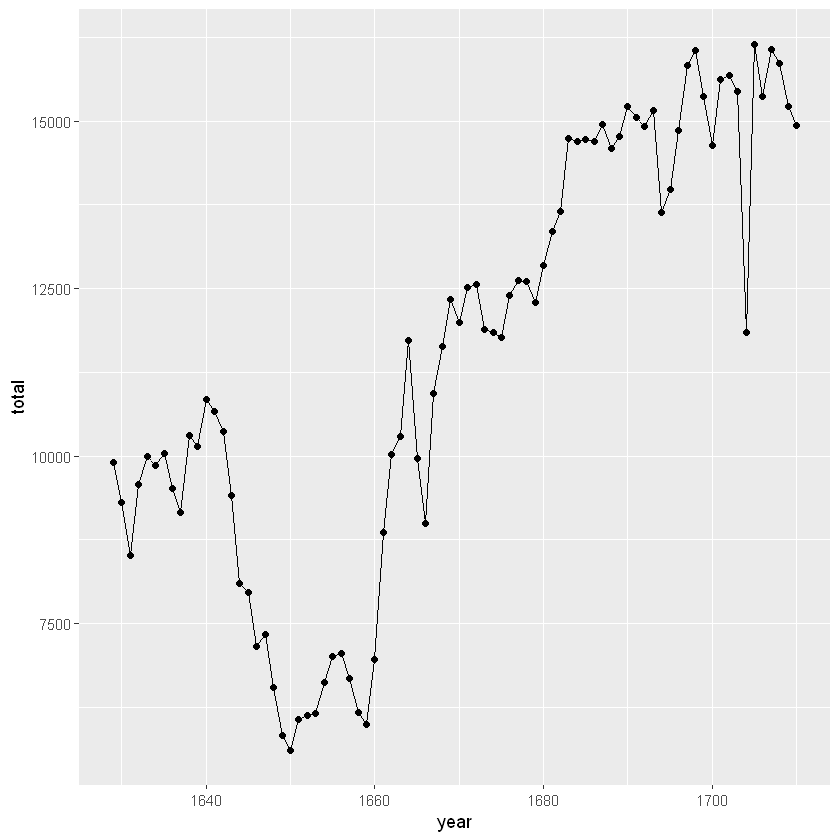

In [14]:
ggplot(data = arbuthnot, aes(x = year, y = total)) +
  geom_line() +
  geom_point()

<div id="exercise">
**Exercise**: Now, generate a plot of the proportion of boys born over time. What 
do you see? 
</div>

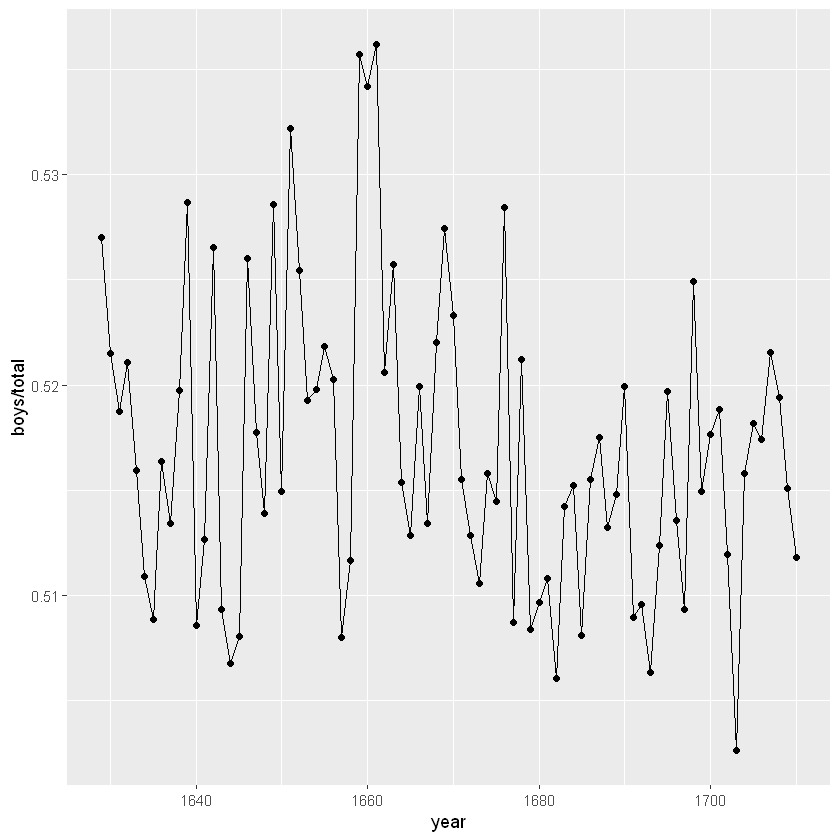

In [15]:
ggplot(data = arbuthnot, aes(x = year, y = boys / total)) +
  geom_line() +
  geom_point()

Finally, in addition to simple mathematical operators like subtraction and 
division, you can ask R to make comparisons like greater than, `>`, less than,
`<`, and equality, `==`. For example, we can ask if boys outnumber girls in each 
year with the expression

In [16]:
arbuthnot <- arbuthnot %>%
  mutate(more_boys = boys > girls)

This command add a new variable to the `arbuthnot` data frame containing the values
of either `TRUE` if that year had more boys than girls, or `FALSE` if that year 
did not (the answer may surprise you). This variable contains different kind of 
data than we have considered so far. All other columns in the `arbuthnot` data 
frame have values are numerical (the year, the number of boys and girls). Here, 
we've asked R to create *logical* data, data where the values are either `TRUE` 
or `FALSE`. In general, data analysis will involve many different kinds of data 
types, and one reason for using R is that it is able to represent and compute 
with many of them.

## Dataset 2: Present birth records

In the previous few pages, you recreated some of the displays and preliminary 
analysis of Arbuthnot's baptism data. Next you will do a similar analysis, 
but for present day birth records in the United States. Load up the 
present day data with the following command.

In [17]:
data(present)

The data are stored in a data frame called `present` which should now be loaded in 
your workspace.

4. How many variables are included in this data set?
<ol>
<li> 2 </li>
<li> >>3 </li>
<li> 4 </li>
<li> 74 </li>
<li> 2013 </li>
</ol>

In [18]:
names(present)

[1] "year"  "boys"  "girls"

<div id="exercise">
**Exercise**: What years are included in this dataset? **Hint:** Use the `range` 
function and `present$year` as its argument.
</div>

In [19]:
range(present$year)

[1] 1940 2013

5. Calculate the total number of births for each year and store these values in a new 
variable called `total` in the `present` dataset. Then, calculate the proportion of 
boys born each year and store these values in a new variable called `prop_boys` in 
the same dataset. Plot these values over time and based on the plot determine if the 
following statement is true or false: The proportion of boys born in the US has 
decreased over time. 
<ol>
<li> >>True </li>
<li> False </li>
</ol>

In [22]:
present$total = present$boys + present$girls
present$prop_boys = present$boys / present$total

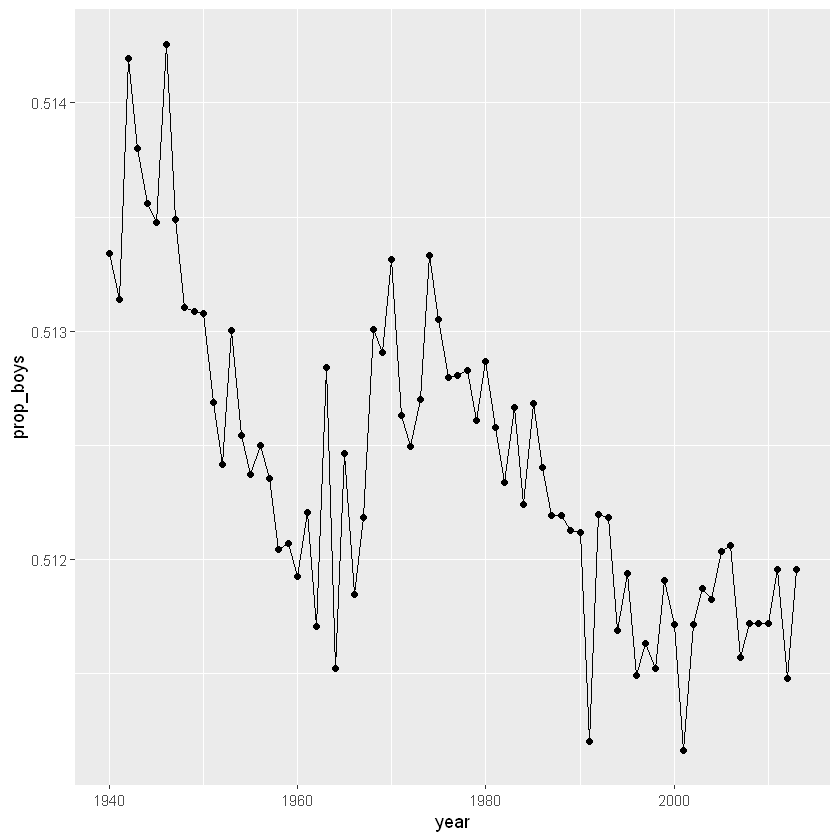

In [23]:
ggplot(data=present, aes(x=year, y=prop_boys))+geom_line()+geom_point()

6. Create a new variable called `more_boys` which contains the value of either `TRUE` 
if that year had more boys than girls, or `FALSE` if that year did not. Based on this 
variable which of the following statements is true? 
<ol>
<li> Every year there are more girls born than boys. </li>
<li> >>Every year there are more boys born than girls. </li>
<li> Half of the years there are more boys born, and the other half more girls born. </li>
</ol>

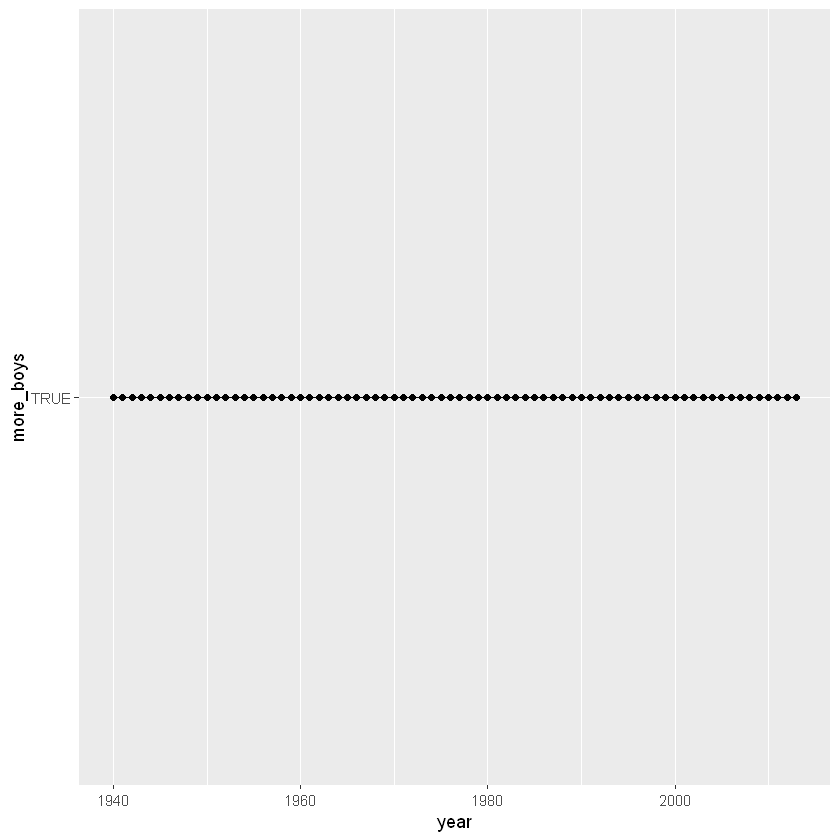

In [28]:
present$more_boys = present$boys > present$girls

ggplot(data=present, aes(x=year, y=more_boys))+geom_line()+geom_point()

Calculate the boy-to-girl ratio each year, and store these values in a new variable called `prop_boy_girl` in the `present` dataset. Plot these values over time. Which of the following best describes the trend? 
<ol>
<li> There appears to be no trend in the boy-to-girl ratio from 1940 to 2013. </li>
<li> There is initially an increase in boy-to-girl ratio, which peaks around 1960. After 1960 there is a decrease in the boy-to-girl ratio, but the number begins to increase in the mid 1970s. </li>
<li> >>There is initially a decrease in the boy-to-girl ratio, and then an increase between 1960 and 1970, followed by a decrease. </li>
<li> The boy-to-girl ratio has increased over time. </li>
<li> There is an initial decrease in the boy-to-girl ratio born but this number appears to level around 1960 and remain constant since then. </li>
</ol>

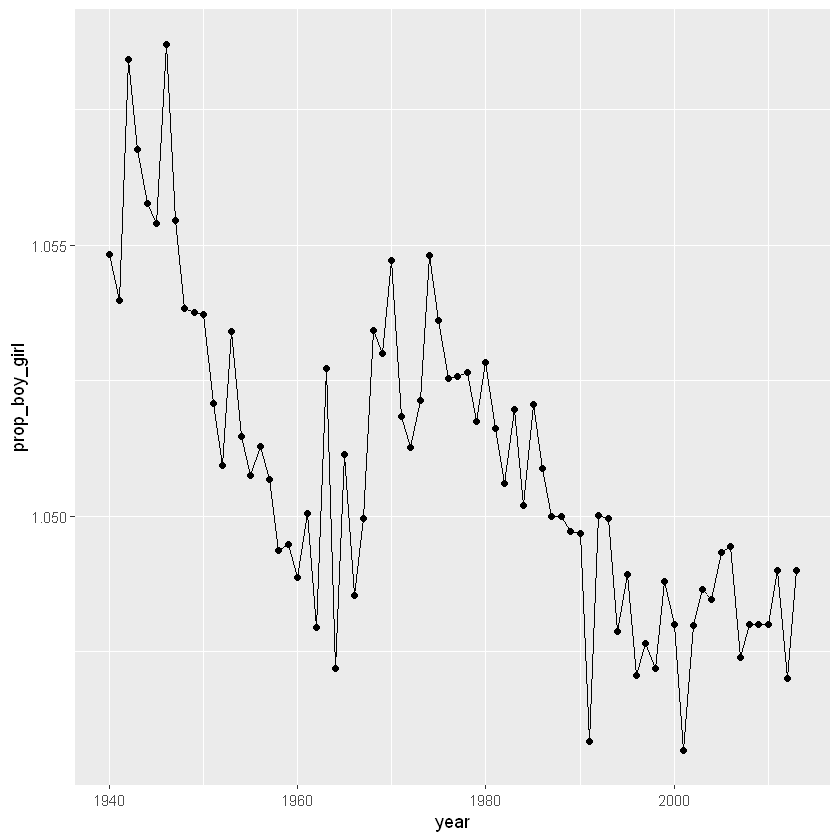

In [30]:
present$prop_boy_girl = present$boys / present$girls
ggplot(data=present, aes(x=year,y=prop_boy_girl))+geom_line()+geom_point()

8. In what year did we see the most total number of births in the U.S.? *Hint:* Sort 
your dataset in descending order based on the `total` column. You can do this 
interactively in the data viewer by clicking on the arrows next to the variable 
names. Or to arrange the data in a descenting order with new function: `descr` (for 
descending order).
<ol>
<li> 1940 </li>
<li> 1957 </li>
<li> 1961 </li>
<li> 1991 </li>
<li> >>2007 </li>
</ol>

In [31]:
# type your code for Question 8 here
# sample code is provided below, edit as necessary, uncomment, and then Knit
#present %>%
#  mutate(total = ?) %>%
#  arrange(desc(total))

present %>% arrange(desc(total))

year,boys,girls,total,prop_boys,more_boys,prop_boy_girl
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
2007,2208071,2108162,4316233,0.5115736,TRUE,1.047392
1961,2186274,2082052,4268326,0.5122088,TRUE,1.050057
2006,2184237,2081318,4265555,0.5120640,TRUE,1.049449
1960,2179708,2078142,4257850,0.5119269,TRUE,1.048873
1957,2179960,2074824,4254784,0.5123550,TRUE,1.050672
2008,2173625,2074069,4247694,0.5117188,TRUE,1.048000
1959,2173638,2071158,4244796,0.5120713,TRUE,1.049480
1958,2152546,2051266,4203812,0.5120462,TRUE,1.049374
1962,2132466,2034896,4167362,0.5117064,TRUE,1.047948


## Resources for learning R and working in RStudio

That was a short introduction to R and RStudio, but we will provide you with more
functions and a more complete sense of the language as the course progresses. You 
might find the following tips and resources helpful.

- In this course we will be using the `dplyr` (for data wrangling) and `ggplot2` (for 
data visualization) extensively. If you are googling for R code, make sure
to also include these package names in your search query. For example, instead
of googling "scatterplot in R", google "scatterplot in R with ggplot2".

- The following cheathseets may come in handy throughout the course. Note that some 
of the code on these cheatsheets may be too advanced for this course, however 
majority of it will become useful as you progress through the course material.
    - [Data wrangling cheatsheet](http://www.rstudio.com/wp-content/uploads/2015/02/data-wrangling-cheatsheet.pdf)
    - [Data visualization cheatsheet](http://www.rstudio.com/wp-content/uploads/2015/12/ggplot2-cheatsheet-2.0.pdf)
    - [R Markdown](http://www.rstudio.com/wp-content/uploads/2016/03/rmarkdown-cheatsheet-2.0.pdf)

- While you will get plenty of exercise working with these packages in the labs of 
this course, if you would like further opportunities to practice we recommend 
checking out the relevant courses at [DataCamp](https://www.datacamp.com/courses).

<div id="license">
This is a derivative of an [OpenIntro](https://www.openintro.org/stat/labs.php) lab, and is released under a [Attribution-NonCommercial-ShareAlike 3.0 United States](https://creativecommons.org/licenses/by-nc-sa/3.0/us/) license.
</div>